# GSE146285 - preprocessing
## Xiaonan Wang
## 03Jun2022

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.5.4 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.0 leidenalg==0.8.3


# Data in

In [2]:
FileDir = '/nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE146285/'

In [3]:
meta = pd.DataFrame([['GSM4376680', 'C57BL/6', 'left ventricle', 'sham', '1', '8', 'Male', 'Rep1'], 
                     ['GSM4376681', 'C57BL/6', 'left ventricle', 'sham', '1', '8', 'Male', 'Rep2'],
                     ['GSM4376682', 'C57BL/6', 'left ventricle', 'sham', '1', '8', 'Male', 'Rep3'],
                     ['GSM4376683', 'C57BL/6', 'left ventricle', 'sham', '1', '8', 'Male', 'Rep4'],
                     ['GSM4376684', 'C57BL/6', 'left ventricle', 'sham', '14', '8', 'Male', 'Rep1'],
                     ['GSM4376685', 'C57BL/6', 'left ventricle', 'sham', '14', '8', 'Male', 'Rep2'],
                     ['GSM4376686', 'C57BL/6', 'left ventricle', 'sham', '14', '8', 'Male', 'Rep3'],
                     ['GSM4376687', 'C57BL/6', 'left ventricle', 'sham', '14', '8', 'Male', 'Rep4'],
                     ['GSM4376688', 'C57BL/6', 'left ventricle', 'sham', '14', '8', 'Male', 'Rep5'],
                     ['GSM4376689', 'C57BL/6', 'left ventricle', 'sham', '14', '8', 'Male', 'Rep6'],
                     ['GSM4376690', 'C57BL/6', 'left ventricle', 'sham', '14', '8', 'Male', 'Rep7'],
                     ['GSM4376691', 'C57BL/6', 'left ventricle', 'sham', '14', '8', 'Male', 'Rep8'],
                     ['GSM4376692', 'C57BL/6', 'left ventricle', 'IR', '1', '8', 'Male', 'Rep1'],
                     ['GSM4376693', 'C57BL/6', 'left ventricle', 'IR', '1', '8', 'Male', 'Rep2'],
                     ['GSM4376694', 'C57BL/6', 'left ventricle', 'IR', '1', '8', 'Male', 'Rep3'],
                     ['GSM4376695', 'C57BL/6', 'left ventricle', 'IR', '1', '8', 'Male', 'Rep4'],
                     ['GSM4376696', 'C57BL/6', 'left ventricle', 'IR', '1', '8', 'Male', 'Rep5'],
                     ['GSM4376697', 'C57BL/6', 'left ventricle', 'IR', '1', '8', 'Male', 'Rep6'],
                     ['GSM4376698', 'C57BL/6', 'left ventricle', 'IR', '1', '8', 'Male', 'Rep7'],
                     ['GSM4376699', 'C57BL/6', 'left ventricle', 'IR', '1', '8', 'Male', 'Rep8'],
                     ['GSM4376700', 'C57BL/6', 'left ventricle', 'IR', '1', '8', 'Male', 'Rep9'],
                     ['GSM4376701', 'C57BL/6', 'left ventricle', 'IR', '3', '8', 'Male', 'Rep1'],
                     ['GSM4376702', 'C57BL/6', 'left ventricle', 'IR', '3', '8', 'Male', 'Rep2'],
                     ['GSM4376703', 'C57BL/6', 'left ventricle', 'IR', '3', '8', 'Male', 'Rep3'],
                     ['GSM4376704', 'C57BL/6', 'left ventricle', 'IR', '3', '8', 'Male', 'Rep4'],
                     ['GSM4376705', 'C57BL/6', 'left ventricle', 'IR', '3', '8', 'Male', 'Rep5'],
                     ['GSM4376706', 'C57BL/6', 'left ventricle', 'IR', '3', '8', 'Male', 'Rep6'],
                     ['GSM4376707', 'C57BL/6', 'left ventricle', 'IR', '3', '8', 'Male', 'Rep7'],
                     ['GSM4376708', 'C57BL/6', 'left ventricle', 'IR', '14', '8', 'Male', 'Rep1'],
                     ['GSM4376709', 'C57BL/6', 'left ventricle', 'IR', '14', '8', 'Male', 'Rep2'],
                     ['GSM4376710', 'C57BL/6', 'left ventricle', 'IR', '14', '8', 'Male', 'Rep3'],
                     ['GSM4614787', 'C57BL/6', 'left ventricle', 'MI', '3', '8', 'Male', 'Rep1'],
                     ['GSM4614788', 'C57BL/6', 'left ventricle', 'MI', '3', '8', 'Male', 'Rep2'],
                     ['GSM4614789', 'C57BL/6', 'left ventricle', 'MI', '3', '8', 'Male', 'Rep3'],
                     ['GSM4614790', 'C57BL/6', 'left ventricle', 'MI', '3', '8', 'Male', 'Rep4'],
                     ['GSM4614791', 'C57BL/6', 'left ventricle', 'MI', '3', '8', 'Male', 'Rep5']],
                    columns = ['Index', 'Strain', 'Tissue', 'Condition', 'Day', 'Age', 'Gender', 'Replicate']
                     )

In [4]:
Files = [x for x in listdir(FileDir) if 'tsv' in x]
print(Files)

['GSM4376694_IR_1day_plate3_UMIcount.tsv', 'GSM4376695_IR_1day_plate4_UMIcount.tsv', 'GSM4376696_IR_1day_plate5_UMIcount.tsv', 'GSM4376697_IR_1day_plate6_UMIcount.tsv', 'GSM4376698_IR_1day_plate7_UMIcount.tsv', 'GSM4376699_IR_1day_plate8_UMIcount.tsv', 'GSM4376700_IR_1day_plate9_UMIcount.tsv', 'GSM4376701_IR_3day_plate1_UMIcount.tsv', 'GSM4376702_IR_3day_plate2_UMIcount.tsv', 'GSM4376703_IR_3day_plate3_UMIcount.tsv', 'GSM4376704_IR_3day_plate4_UMIcount.tsv', 'GSM4376705_IR_3day_plate5_UMIcount.tsv', 'GSM4376706_IR_3day_plate6_UMIcount.tsv', 'GSM4376707_IR_3day_plate7_UMIcount.tsv', 'GSM4376708_IR_14day_plate1_UMIcount.tsv', 'GSM4376709_IR_14day_plate2_UMIcount.tsv', 'GSM4376710_IR_14day_plate3_UMIcount.tsv', 'GSM4614787_MI_3day_plate1_UMIcount.tsv', 'GSM4614788_MI_3day_plate2_UMIcount.tsv', 'GSM4614789_MI_3day_plate3_UMIcount.tsv', 'GSM4614790_MI_3day_plate4_UMIcount.tsv', 'GSM4614791_MI_3day_plate5_UMIcount.tsv', 'GSM4376680_Sham_1day_plate1_UMIcount.tsv', 'GSM4376681_Sham_1day_plate2

In [5]:
adata = []
for idx, row in meta.iterrows():
    FN = [x for x in Files if row['Index'] in x][0]
    adata_sub = sc.read(FileDir + FN, cache=True).T
    adata_sub.obs['Index'] = row['Index']
    adata_sub.obs['Day'] = row['Day']
    adata_sub.obs['Condition'] = row['Condition']
    adata_sub.obs['Genotype'] = 'WT'
    adata_sub.obs['CellType'] = 'infarcted region'
    adata_sub.obs['Organism'] = 'Mus musculus'
    adata_sub.obs['Strain'] = row['Strain']
    adata_sub.obs['Development_stage'] = 'adult'
    adata_sub.obs['Tissue'] = row['Tissue']
    adata_sub.obs['Gender'] = row['Gender']
    adata_sub.obs['Replicate'] = row['Replicate']
    adata_sub.obs['Age'] = row['Age']
    adata_sub.obs['StudyID'] = row['Index']
    adata_sub.obs_names = [row['Index']+'_'+row['Condition']+'_'+row['Day']+'_'+row['Replicate']+'_'+str(x) for x in adata_sub.obs_names]
    adata_sub = adata_sub[:,1:].copy()
    adata_sub.var_names = [x.split('__')[0] for x in adata_sub.var_names]
    ERCCs = [x for x in adata_sub.var_names if 'ERCC-' in x]
    adata_sub = adata_sub[:,~np.in1d(adata_sub.var_names, ERCCs)]
    adata_sub.var_names_make_unique()
    adata.append(adata_sub)
    del adata_sub

... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE146285-GSM4376680_Sham_1day_plate1_UMIcount.h5ad
... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE146285-GSM4376681_Sham_1day_plate2_UMIcount.h5ad
... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE146285-GSM4376682_Sham_1day_plate3_UMIcount.h5ad
... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE146285-GSM4376683_Sham_1day_plate4_UMIcount.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE146285-GSM4376684_Sham_14day_plate1_UMIcount.h5ad
... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE146285-GSM4376685_Sham_14day_plate2_UMIcount.h5ad
... reading from cache file cache/nfs01data1-Groups-Wangxi

# QC

In [6]:
[x for x in adata[0].var_names if 'mt-' in x]

['mt-Rnr1',
 'mt-Rnr2',
 'mt-Ta',
 'mt-Tc',
 'mt-Td',
 'mt-Te',
 'mt-Tf',
 'mt-Tg',
 'mt-Th',
 'mt-Ti',
 'mt-Tk',
 'mt-Tl1',
 'mt-Tl2',
 'mt-Tm',
 'mt-Tn',
 'mt-Tp',
 'mt-Tq',
 'mt-Tr',
 'mt-Ts1',
 'mt-Ts2',
 'mt-Tt',
 'mt-Tv',
 'mt-Tw',
 'mt-Ty']

In [7]:
for i in range(len(adata)):
    adata[i].var['mt'] = adata[i].var_names.str.startswith('mt-') 
    sc.pp.calculate_qc_metrics(adata[i], qc_vars=['mt'], inplace=True)

/nfs01data1/Groups/Wangxiaonan/programs/miniconda3/envs/scanpy170/lib/python3.6/site-packages/scanpy/preprocessing/_qc.py:399: RuntimeWarning: invalid value encountered in true_divide
  return values / sums[:, None]


/nfs01data1/Groups/Wangxiaonan/programs/miniconda3/envs/scanpy170/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


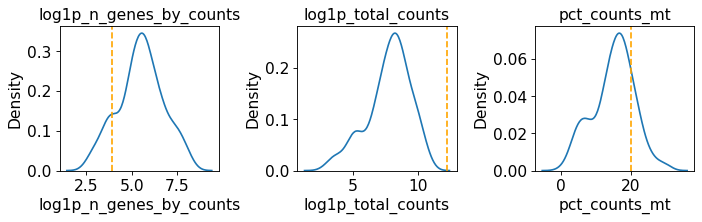

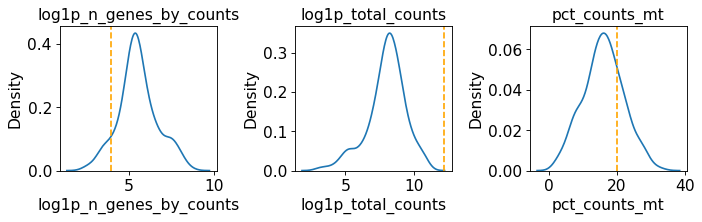

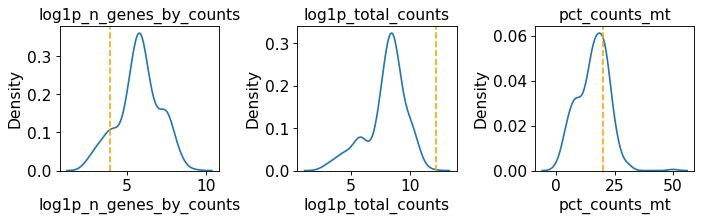

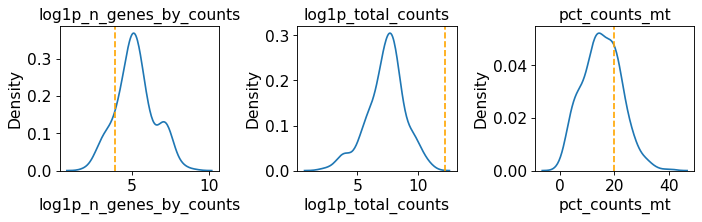

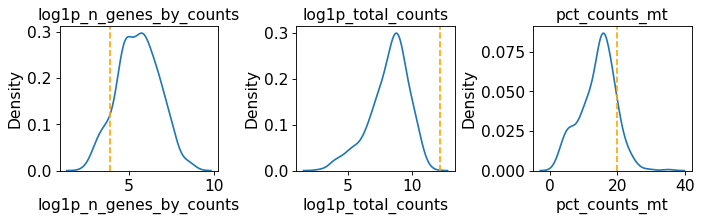

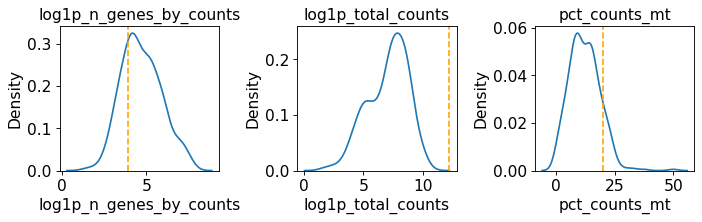

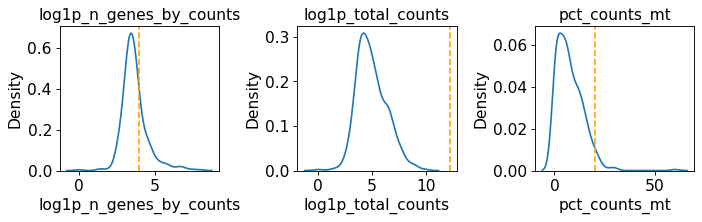

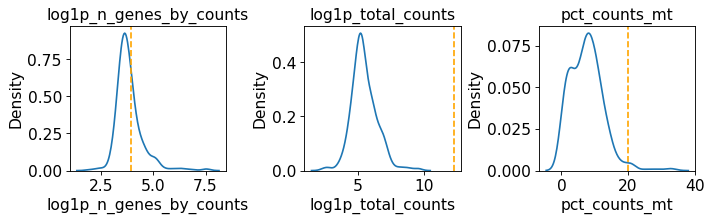

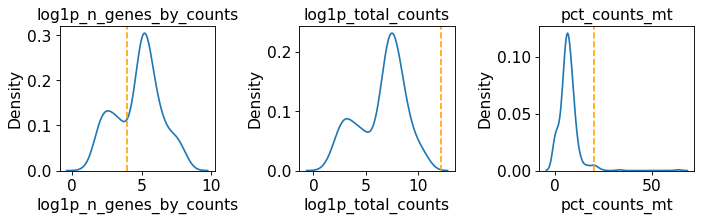

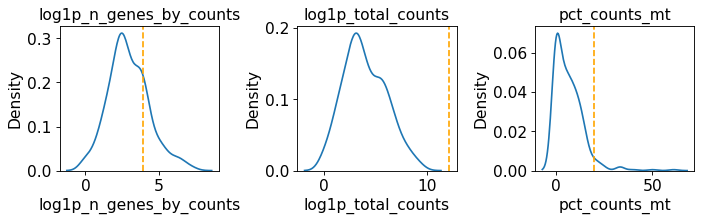

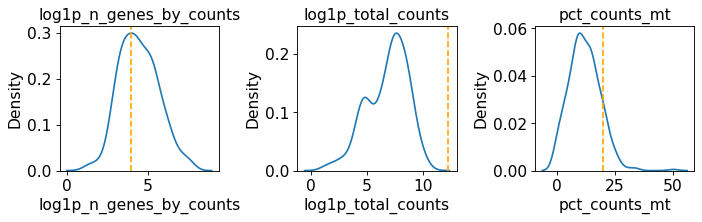

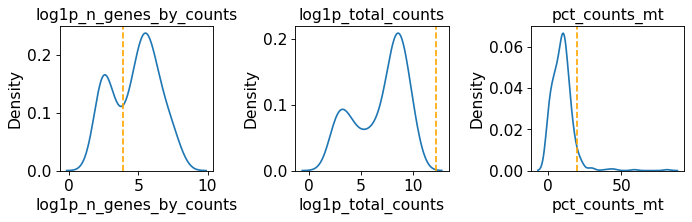

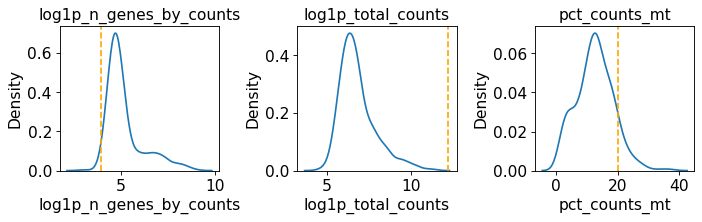

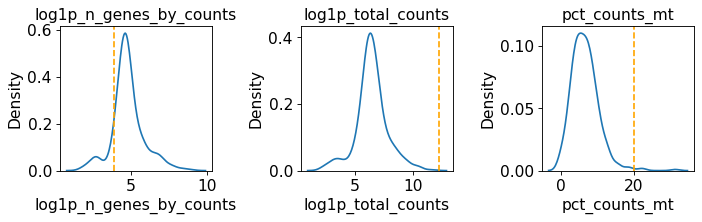

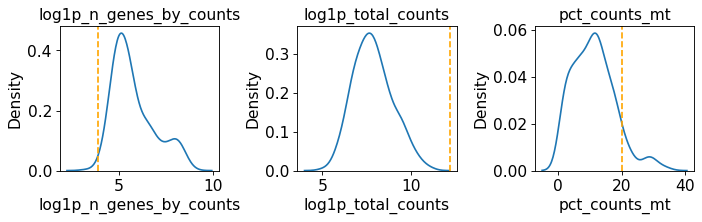

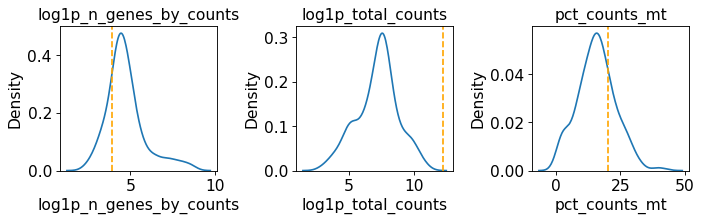

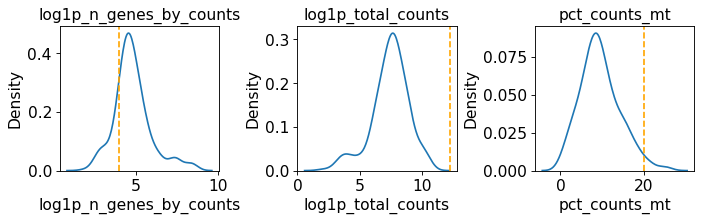

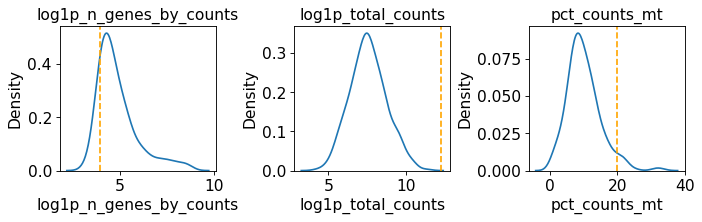

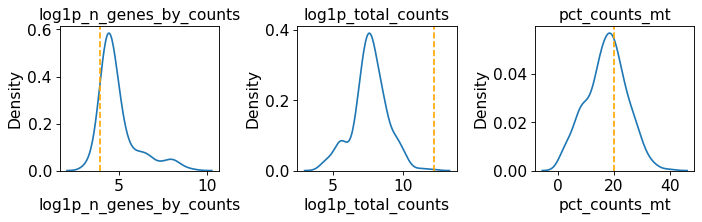

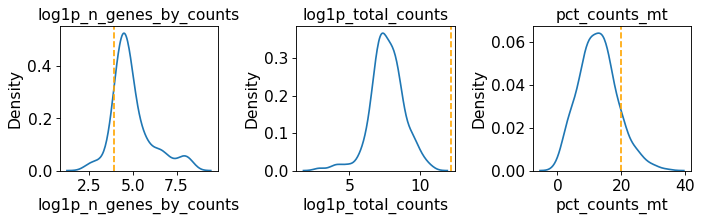

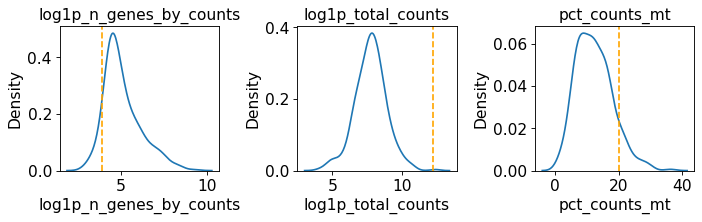

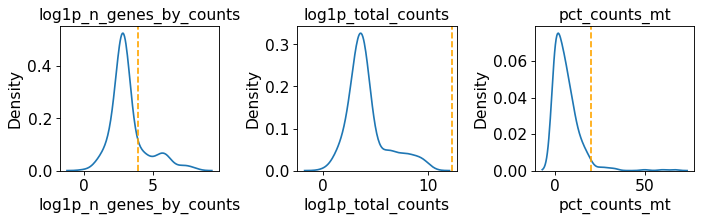

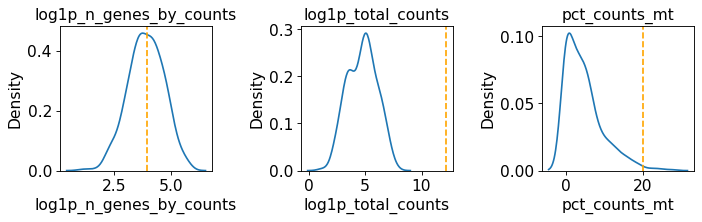

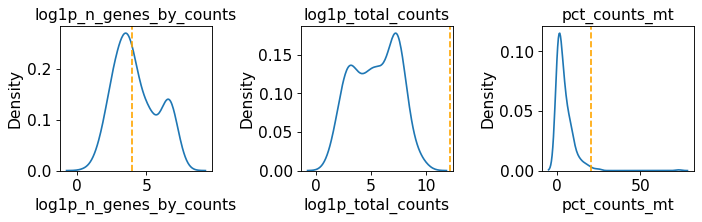

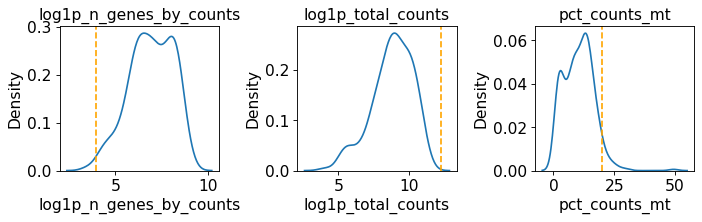

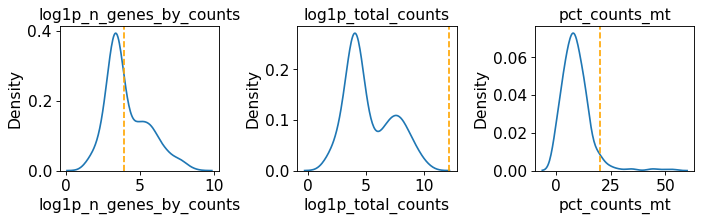

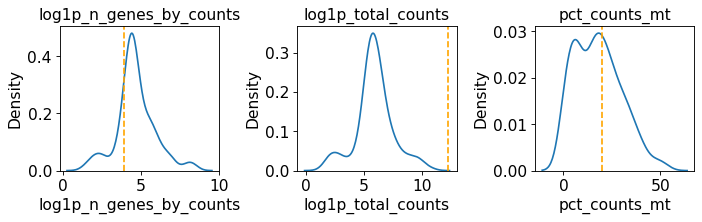

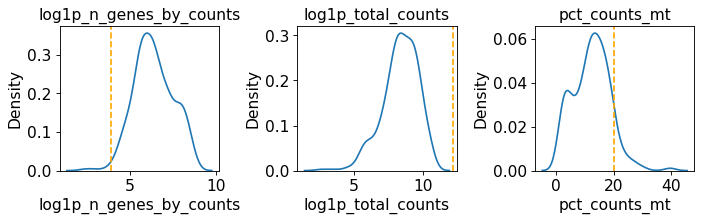

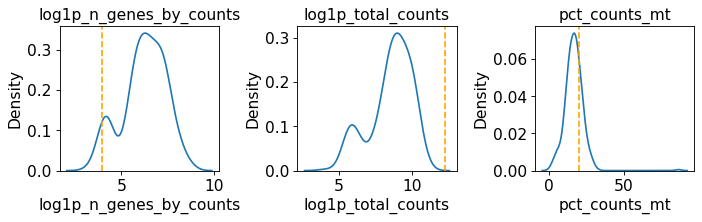

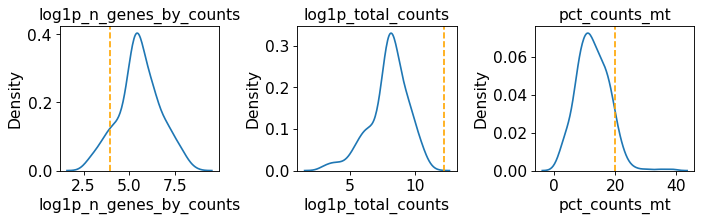

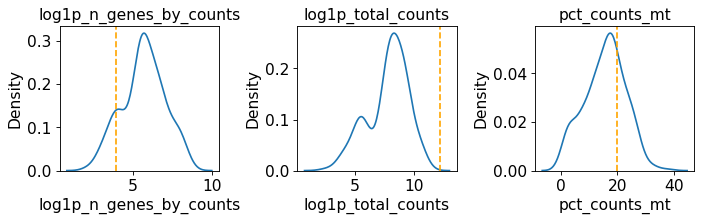

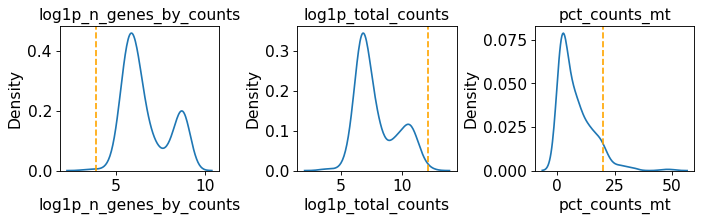

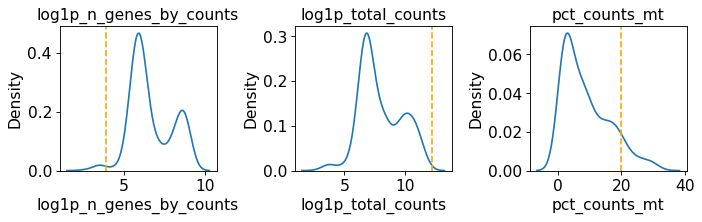

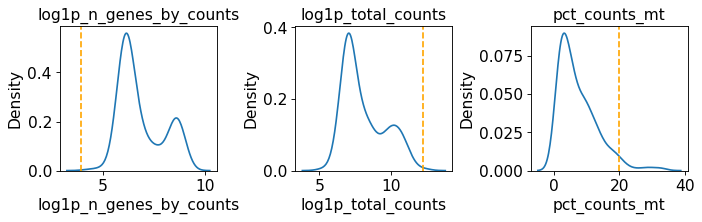

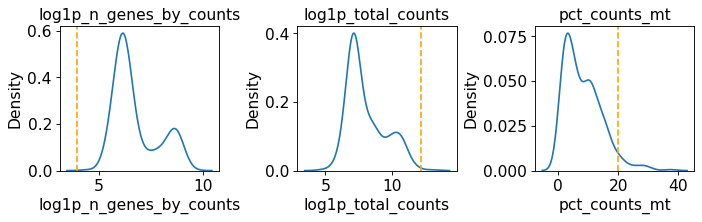

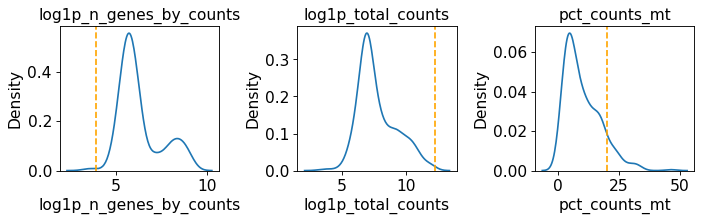

In [8]:
cutoffs = [[50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)],
           [50,200000, np.exp(20)]
          ]
for i in range(len(adata)):
    obs_terms = ['log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_mt']
    fig,ax = plt.subplots(1,3, figsize=(9,3))
    for j in range(len(obs_terms)):
        sns.kdeplot(adata[i].obs[obs_terms[j]], ax=ax[j])
        ax[j].grid(False)
        ax[j].set_title(obs_terms[j])
        ax[j].axvline(np.log1p(cutoffs[i][j]), c='orange', linestyle='--')
    plt.tight_layout()

In [9]:
for i in range(len(adata)):
    sc.pp.filter_cells(adata[i], min_genes=cutoffs[i][0])
    #sc.pp.filter_genes(adata[i], min_cells=1)
    adata[i] = adata[i][(adata[i].obs['total_counts'] <= cutoffs[i][1]) & (adata[i].obs['pct_counts_mt'] <= np.log(cutoffs[i][2])), :].copy()
    print(adata[i].obs['Condition'].value_counts().sort_index())

filtered out 52 cells that have less than 50 genes expressed
filtered out 31 cells that have less than 50 genes expressed
filtered out 41 cells that have less than 50 genes expressed
filtered out 54 cells that have less than 50 genes expressed
filtered out 38 cells that have less than 50 genes expressed
filtered out 98 cells that have less than 50 genes expressed
filtered out 290 cells that have less than 50 genes expressed


sham    263
Name: Condition, dtype: int64
sham    263
Name: Condition, dtype: int64
sham    244
Name: Condition, dtype: int64
sham    237
Name: Condition, dtype: int64
sham    308
Name: Condition, dtype: int64
sham    261
Name: Condition, dtype: int64


filtered out 257 cells that have less than 50 genes expressed
filtered out 114 cells that have less than 50 genes expressed
filtered out 302 cells that have less than 50 genes expressed
filtered out 142 cells that have less than 50 genes expressed
filtered out 128 cells that have less than 50 genes expressed
filtered out 1 cells that have less than 50 genes expressed
filtered out 38 cells that have less than 50 genes expressed
filtered out 2 cells that have less than 50 genes expressed


sham    88
Name: Condition, dtype: int64
sham    123
Name: Condition, dtype: int64
sham    270
Name: Condition, dtype: int64
sham    78
Name: Condition, dtype: int64
sham    215
Name: Condition, dtype: int64
sham    251
Name: Condition, dtype: int64
IR    346
Name: Condition, dtype: int64
IR    343
Name: Condition, dtype: int64


filtered out 70 cells that have less than 50 genes expressed
filtered out 63 cells that have less than 50 genes expressed
filtered out 55 cells that have less than 50 genes expressed
filtered out 31 cells that have less than 50 genes expressed
filtered out 35 cells that have less than 50 genes expressed
filtered out 29 cells that have less than 50 genes expressed


IR    349
Name: Condition, dtype: int64
IR    223
Name: Condition, dtype: int64
IR    313
Name: Condition, dtype: int64
IR    315
Name: Condition, dtype: int64
IR    219
Name: Condition, dtype: int64
IR    311
Name: Condition, dtype: int64


filtered out 311 cells that have less than 50 genes expressed
filtered out 194 cells that have less than 50 genes expressed
filtered out 193 cells that have less than 50 genes expressed
filtered out 2 cells that have less than 50 genes expressed
filtered out 230 cells that have less than 50 genes expressed
filtered out 66 cells that have less than 50 genes expressed
filtered out 3 cells that have less than 50 genes expressed


IR    313
Name: Condition, dtype: int64
IR    72
Name: Condition, dtype: int64
IR    188
Name: Condition, dtype: int64
IR    188
Name: Condition, dtype: int64
IR    365
Name: Condition, dtype: int64
IR    150
Name: Condition, dtype: int64
IR    182
Name: Condition, dtype: int64


filtered out 15 cells that have less than 50 genes expressed
filtered out 35 cells that have less than 50 genes expressed
filtered out 48 cells that have less than 50 genes expressed
filtered out 1 cells that have less than 50 genes expressed
filtered out 8 cells that have less than 50 genes expressed


IR    348
Name: Condition, dtype: int64
IR    278
Name: Condition, dtype: int64
IR    322
Name: Condition, dtype: int64
IR    236
Name: Condition, dtype: int64
MI    358
Name: Condition, dtype: int64


filtered out 3 cells that have less than 50 genes expressed


MI    341
Name: Condition, dtype: int64
MI    369
Name: Condition, dtype: int64
MI    366
Name: Condition, dtype: int64
MI    344
Name: Condition, dtype: int64


In [11]:
#combine and save the raw counts
adata1 = anndata.AnnData.concatenate(*adata, join='outer', fill_value=0)

In [12]:
adata1.shape

(9440, 20756)

In [13]:
sc.pp.filter_genes(adata1, min_cells=1)

filtered out 107 genes that are detected in less than 1 cells


In [14]:
adata1.write('./write/GSE146285_raw.h5ad')

... storing 'Index' as categorical
... storing 'Day' as categorical
... storing 'Condition' as categorical
... storing 'Genotype' as categorical
... storing 'CellType' as categorical
... storing 'Organism' as categorical
... storing 'Strain' as categorical
... storing 'Development_stage' as categorical
... storing 'Tissue' as categorical
... storing 'Gender' as categorical
... storing 'Replicate' as categorical
... storing 'Age' as categorical
... storing 'StudyID' as categorical
... storing 'mt-0' as categorical
... storing 'mt-1' as categorical
... storing 'mt-10' as categorical
... storing 'mt-11' as categorical
... storing 'mt-12' as categorical
... storing 'mt-13' as categorical
... storing 'mt-14' as categorical
... storing 'mt-15' as categorical
... storing 'mt-16' as categorical
... storing 'mt-17' as categorical
... storing 'mt-18' as categorical
... storing 'mt-19' as categorical
... storing 'mt-2' as categorical
... storing 'mt-20' as categorical
... storing 'mt-21' as categ

# Normalisation

In [15]:
adata = sc.read('./write/GSE146285_raw.h5ad')

In [16]:
print(adata.shape)

(9440, 20649)


In [17]:
# normalisation
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [18]:
# log counts
sc.pp.log1p(adata)

In [19]:
adata.raw = adata

In [20]:
print(adata.shape)

(9440, 20649)


In [21]:
adata.write('./write/GSE146285_lognorm.h5ad')

# Cell Cycle Assignment

In [22]:
adata = sc.read('./write/GSE146285_lognorm.h5ad')

In [23]:
print(adata.shape)

(9440, 20649)


In [24]:
cell_cycle_genes = [x.strip()[0].upper()+x.strip()[1:].lower() for x in open('/nfs01data1/Groups/Wangxiaonan/Lab_members/Files/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

97


In [25]:
np.setdiff1d(cell_cycle_genes, adata.raw.var_names)

array([], dtype='<U8')

In [27]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
print('Number of s_genes: '+str(len(s_genes)))
print('Number of g2m_genes: '+str(len(g2m_genes)))
print('Total number of cell cycle genes: '+str(len(cell_cycle_genes)))

Number of s_genes: 43
Number of g2m_genes: 54
Total number of cell cycle genes: 97


In [28]:
ERR = adata.obs['StudyID'].cat.categories
print(ERR)

Index(['GSM4376680', 'GSM4376681', 'GSM4376682', 'GSM4376683', 'GSM4376684',
       'GSM4376685', 'GSM4376686', 'GSM4376687', 'GSM4376688', 'GSM4376689',
       'GSM4376690', 'GSM4376691', 'GSM4376692', 'GSM4376693', 'GSM4376694',
       'GSM4376695', 'GSM4376696', 'GSM4376697', 'GSM4376698', 'GSM4376699',
       'GSM4376700', 'GSM4376701', 'GSM4376702', 'GSM4376703', 'GSM4376704',
       'GSM4376705', 'GSM4376706', 'GSM4376707', 'GSM4376708', 'GSM4376709',
       'GSM4376710', 'GSM4614787', 'GSM4614788', 'GSM4614789', 'GSM4614790',
       'GSM4614791'],
      dtype='object')


In [29]:
phase = []
for i in range(len(ERR)):
    adata_sub = adata[adata.obs['StudyID'] == ERR[i]].copy()
    print(adata_sub.shape)
    sc.pp.scale(adata_sub)
    sc.tl.score_genes_cell_cycle(adata_sub, s_genes=s_genes, g2m_genes=g2m_genes, use_raw=False)
    phase.append(adata_sub.obs[['phase', 'S_score', 'G2M_score']])

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    602 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    644 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(263, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    558 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    682 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(263, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    731 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(244, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    642 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    685 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(237, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    687 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    644 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(308, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    512 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    427 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(261, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    344 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    299 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(88, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    342 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    343 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(123, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    559 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    512 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(270, 20649)


calculating cell cycle phase
computing score 'S_score'


(78, 20649)


    finished: added
    'S_score', score of gene set (adata.obs).
    171 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    257 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    473 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    515 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(215, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    515 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    558 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(251, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    642 total control genes are used. (0:00:00)
computing score 'G2M_score'


(346, 20649)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    514 total control genes are used. (0:00:00)
computing score 'G2M_score'


(343, 20649)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    600 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    644 total control genes are used. (0:00:00)
computing score 'G2M_score'


(349, 20649)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    726 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    602 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    602 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(223, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    600 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(313, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    641 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(315, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    686 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    687 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(219, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    645 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    602 total control genes are used. (0:00:00)


(311, 20649)


-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    557 total control genes are used. (0:00:00)


(313, 20649)


-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    430 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    343 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(72, 20649)


calculating cell cycle phase
computing score 'S_score'


(188, 20649)


    finished: added
    'S_score', score of gene set (adata.obs).
    215 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    299 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    549 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    514 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(188, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    816 total control genes are used. (0:00:00)
computing score 'G2M_score'


(365, 20649)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    770 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    559 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    558 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(150, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    601 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    599 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(182, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
computing score 'G2M_score'


(348, 20649)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    685 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    731 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(278, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    600 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    684 total control genes are used. (0:00:00)


(322, 20649)


-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    727 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    729 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(236, 20649)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    686 total control genes are used. (0:00:00)
computing score 'G2M_score'


(358, 20649)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    770 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    642 total control genes are used. (0:00:00)
computing score 'G2M_score'


(341, 20649)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    729 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    772 total control genes are used. (0:00:00)
computing score 'G2M_score'


(369, 20649)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    726 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    726 total control genes are used. (0:00:00)
computing score 'G2M_score'


(366, 20649)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    684 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'


(344, 20649)


    finished: added
    'S_score', score of gene set (adata.obs).
    686 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    772 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


In [30]:
phase_pd = pd.concat(phase)

In [31]:
phase_pd.head()

,phase,S_score,G2M_score
GSM4376680_sham_1_Rep1_0-0,G2M,0.041114,0.074238
GSM4376680_sham_1_Rep1_2-0,G1,-0.213605,-0.150977
GSM4376680_sham_1_Rep1_3-0,G1,-0.040806,-0.059703
GSM4376680_sham_1_Rep1_4-0,S,0.026778,-0.011489
GSM4376680_sham_1_Rep1_5-0,G2M,0.047802,0.051854


In [32]:
print(phase_pd.shape)

(9440, 3)


In [33]:
phase_pd.to_csv('cell_cycle_results.txt')

# Select highly variable genes

In [34]:
adata = sc.read('./write/GSE146285_lognorm.h5ad')

In [35]:
cell_cycle_results = pd.read_csv('cell_cycle_results.txt', index_col=0)
adata.obs = pd.concat([adata.obs, cell_cycle_results], axis=1)

In [36]:
adata.obs.head(3)

,Index,Day,Condition,Genotype,CellType,Organism,Strain,Development_stage,Tissue,Gender,...,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_genes,batch,n_counts,phase,S_score,G2M_score
GSM4376680_sham_1_Rep1_0-0,GSM4376680,1,sham,WT,infarcted region,Mus musculus,C57BL/6,adult,left ventricle,Male,...,100.000000,9.0,2.302585,3.703704,53,0,243.0,G2M,0.041114,0.074238
GSM4376680_sham_1_Rep1_2-0,GSM4376680,1,sham,WT,infarcted region,Mus musculus,C57BL/6,adult,left ventricle,Male,...,91.263714,1659.0,7.414573,13.482325,1439,0,12305.0,G1,-0.213605,-0.150977
GSM4376680_sham_1_Rep1_3-0,GSM4376680,1,sham,WT,infarcted region,Mus musculus,C57BL/6,adult,left ventricle,Male,...,98.469531,988.0,6.896694,13.872507,609,0,7122.0,G1,-0.040806,-0.059703


In [37]:
# find highly variable genes
# parameters are mainly selected depends on user preference
sc.pp.highly_variable_genes(
    adata, min_mean=0.02, max_mean=3, min_disp=0.3, batch_key='batch', inplace=True)

extracting highly variable genes
... storing 'phase' as categorical
    finished (0:00:10)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


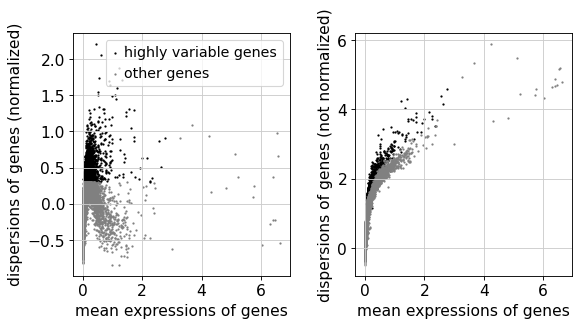

In [38]:
sc.pl.highly_variable_genes(adata)

In [39]:
print(np.sum(adata.var.highly_variable))

3233


In [40]:
adata = adata[:, adata.var.highly_variable].copy()

In [41]:
adata.write('./write/GSE146285_lognorm_hvg.h5ad')

# Preliminary processing

In [42]:
adata = sc.read('./write/GSE146285_lognorm_hvg.h5ad')

In [43]:
# normally regress out the top layers of unwanted effects
sc.pp.regress_out(adata, ['total_counts','n_genes_by_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']
    finished (0:00:38)


In [44]:
# scale for pca
sc.pp.scale(adata)
# pca
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


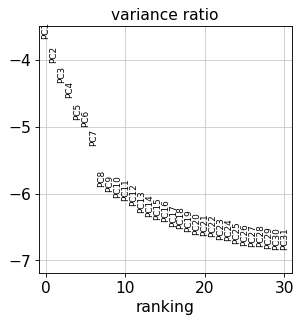

In [45]:
sc.pl.pca_variance_ratio(adata, log=True)

In [46]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)


In [49]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:21)


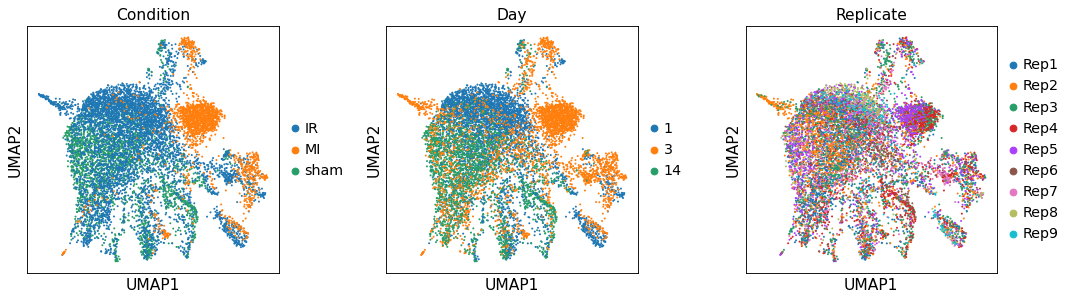

In [50]:
sc.pl.umap(adata, color= ['Condition', 'Day', 'Replicate'], wspace=0.3)

In [51]:
adata.write('./write/GSE146285_processed.h5ad')

#  Further modify

In [52]:
adata = sc.read('./write/GSE146285_processed.h5ad')

In [53]:
adata.obs['Day'].value_counts()

1     3739
3     3271
14    2430
Name: Day, dtype: int64

In [54]:
adata.obs['Day'] = adata.obs['Day'].astype(int)

In [55]:
adata.obs['Age'].value_counts()

8    9440
Name: Age, dtype: int64

In [56]:
adata.obs['Age'] = adata.obs['Age'].astype(int)

In [57]:
adata.obs['Development_stage'].value_counts()

adult    9440
Name: Development_stage, dtype: int64

In [58]:
adata.obs['Genotype'].value_counts()

WT    9440
Name: Genotype, dtype: int64

In [59]:
adata.obs['CellType'].value_counts()

infarcted region    9440
Name: CellType, dtype: int64

In [73]:
adata.obs['CellType'] = 'Cardiac cells'

In [74]:
adata.obs['CellType'].value_counts()

Cardiac cells    9440
Name: CellType, dtype: int64

In [62]:
adata.obs['Tissue'].value_counts()

left ventricle    9440
Name: Tissue, dtype: int64

In [71]:
adata.obs['Tissue'] = 'infarcted area'

In [72]:
adata.obs['Tissue'].value_counts()

infarcted area    9440
Name: Tissue, dtype: int64

In [64]:
adata.obs['StudyID'].value_counts()

GSM4614789    369
GSM4614790    366
GSM4376704    365
GSM4614787    358
GSM4376694    349
GSM4376707    348
GSM4376692    346
GSM4614791    344
GSM4376693    343
GSM4614788    341
GSM4376709    322
GSM4376697    315
GSM4376700    313
GSM4376696    313
GSM4376699    311
GSM4376684    308
GSM4376708    278
GSM4376688    270
GSM4376680    263
GSM4376681    263
GSM4376685    261
GSM4376691    251
GSM4376682    244
GSM4376683    237
GSM4376710    236
GSM4376695    223
GSM4376698    219
GSM4376690    215
GSM4376702    188
GSM4376703    188
GSM4376706    182
GSM4376705    150
GSM4376687    123
GSM4376686     88
GSM4376689     78
GSM4376701     72
Name: StudyID, dtype: int64

In [66]:
adata.obs['StudyID'] = 'GSE146285'

In [67]:
adata.obs['StudyID'].value_counts()

GSE146285    9440
Name: StudyID, dtype: int64

In [65]:
adata.obs['Index'].value_counts()

GSM4614789    369
GSM4614790    366
GSM4376704    365
GSM4614787    358
GSM4376694    349
GSM4376707    348
GSM4376692    346
GSM4614791    344
GSM4376693    343
GSM4614788    341
GSM4376709    322
GSM4376697    315
GSM4376700    313
GSM4376696    313
GSM4376699    311
GSM4376684    308
GSM4376708    278
GSM4376688    270
GSM4376680    263
GSM4376681    263
GSM4376685    261
GSM4376691    251
GSM4376682    244
GSM4376683    237
GSM4376710    236
GSM4376695    223
GSM4376698    219
GSM4376690    215
GSM4376702    188
GSM4376703    188
GSM4376706    182
GSM4376705    150
GSM4376687    123
GSM4376686     88
GSM4376689     78
GSM4376701     72
Name: Index, dtype: int64

In [68]:
adata.obs['Condition'].value_counts()

IR      5061
sham    2601
MI      1778
Name: Condition, dtype: int64

In [69]:
adata.obs['Condition'] = ['Sham' if 'sham' in x else x for x in adata.obs['Condition']]

In [70]:
adata.obs['Condition'].value_counts()

IR      5061
Sham    2601
MI      1778
Name: Condition, dtype: int64

In [75]:
adata.write('./write/GSE146285_processed.h5ad')

... storing 'Condition' as categorical
... storing 'CellType' as categorical
... storing 'Tissue' as categorical
... storing 'StudyID' as categorical
